<a href="https://colab.research.google.com/github/tomeliud/test_project/blob/master/MultipleLinear_Quantile_Lasso_Ridge_ElasticNet_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction 

This project will entail using different regression models which seek to compare how house prices are affected by other factors such as bedrooms, square feet, etc.

Research question?

Factors affecting house prices and buliding a model that predicts house models 



Metric of success 

Identfying the appropriate predictor 

## Importing our libraries 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Previewing and tydying our dataset 

In [0]:
housing = pd.read_csv('Independent Project Week 7 - house_data.csv')

In [0]:
housing.head(4)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000

[4 rows x 20 columns]

In [0]:
housing.tail(5)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [0]:
housing.isnull().any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [0]:
#checking for duplicates 
housing.duplicated().any()

True

In [0]:
#removing duplicates 
housing.drop_duplicates()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21610 rows x 20 columns]

In [0]:
housing.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [0]:
#size
print("The dataset has " + str(housing.shape[0]) + " rows, and " + str(housing.shape[1]) + " columns")

The dataset has 21613 rows, and 20 columns


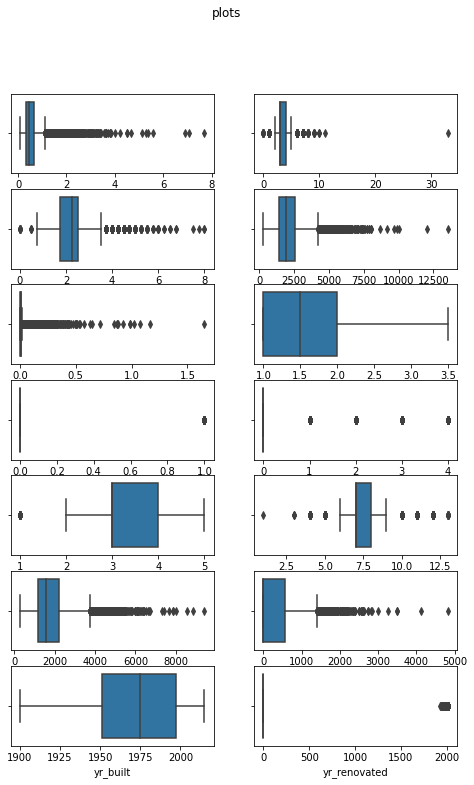

In [0]:
#checking for outliers 
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7,2, figsize=(8, 12))
fig.suptitle('plots')

sns.boxplot(housing['price'], ax=ax1)
sns.boxplot(housing['bedrooms'], ax=ax2)
sns.boxplot(housing['bathrooms'], ax=ax3)
sns.boxplot(housing['sqft_living'], ax=ax4)
sns.boxplot(housing['sqft_lot'], ax=ax5)
sns.boxplot(housing['floors'], ax=ax6)
sns.boxplot(housing['waterfront'], ax=ax7)
sns.boxplot(housing['view'], ax=ax8)
sns.boxplot(housing['condition'], ax=ax9)
sns.boxplot(housing['grade'], ax=ax10)
sns.boxplot(housing['sqft_above'], ax=ax11)
sns.boxplot(housing['sqft_basement'], ax=ax12)
sns.boxplot(housing['yr_built'], ax=ax13)
sns.boxplot(housing['yr_renovated'], ax=ax14)
plt.show()

# Exploatory data analysis 

In [0]:
housing.head(3)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062

[3 rows x 20 columns]

In [0]:
#droping columns wedo not need 
housing.drop(['id'], 1, inplace=True)

## Univariate data analysis 

In [0]:
#stastical representation of our data 
stat = housing.describe()
stat.loc['Range'] = stat.loc['max'] - stat.loc['min']
stat.loc['IQR'] = stat.loc['75%'] - stat.loc['25%'] 
stat

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.161300e+04  21613.000000  ...   21613.000000   21613.000000
mean   5.401822e+05      3.370842  ...    1986.552492   12768.455652
std    3.673622e+05      0.930062  ...     685.391304   27304.179631
min    7.500000e+04      0.000000  ...     399.000000     651.000000
25%    3.219500e+05      3.000000  ...    1490.000000    5100.000000
50%    4.500000e+05      3.000000  ...    1840.000000    7620.000000
75%    6.450000e+05      4.000000  ...    2360.000000   10083.000000
max    7.700000e+06     33.000000  ...    6210.000000  871200.000000
Range  7.625000e+06     33.000000  ...    5811.000000  870549.000000
IQR    3.230500e+05      1.000000  ...     870.000000    4983.000000

[10 rows x 19 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

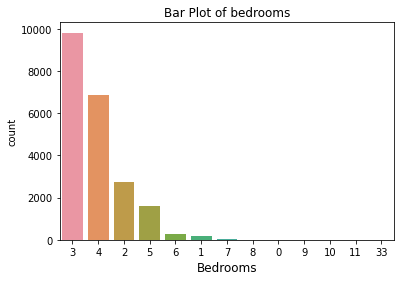

In [0]:
#bedrooms bar plot 
sns.countplot(housing['bedrooms'], order= housing['bedrooms'].value_counts().index)
plt.title('Bar Plot of bedrooms')
plt.xlabel('Bedrooms', fontsize=12)
plt.xticks(rotation = 0)

From the plot above we can note that most houses were 3 and four bedrooms 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

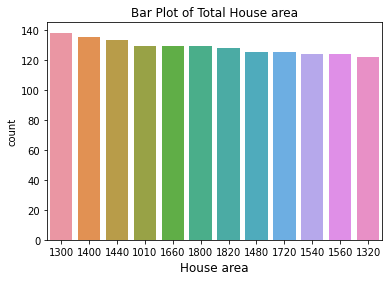

In [0]:
#Living space bar plot 
sns.countplot(housing['sqft_living'], order= housing['sqft_living'].value_counts().iloc[:12].index)
plt.title('Bar Plot of Total House area')
plt.xlabel('House area', fontsize=12)
plt.xticks(rotation = 0)

From the above plot it is worthwhile noting that most of the houses living rooms were between 1300 and 1800 square foot 

## Bivariate analysis 

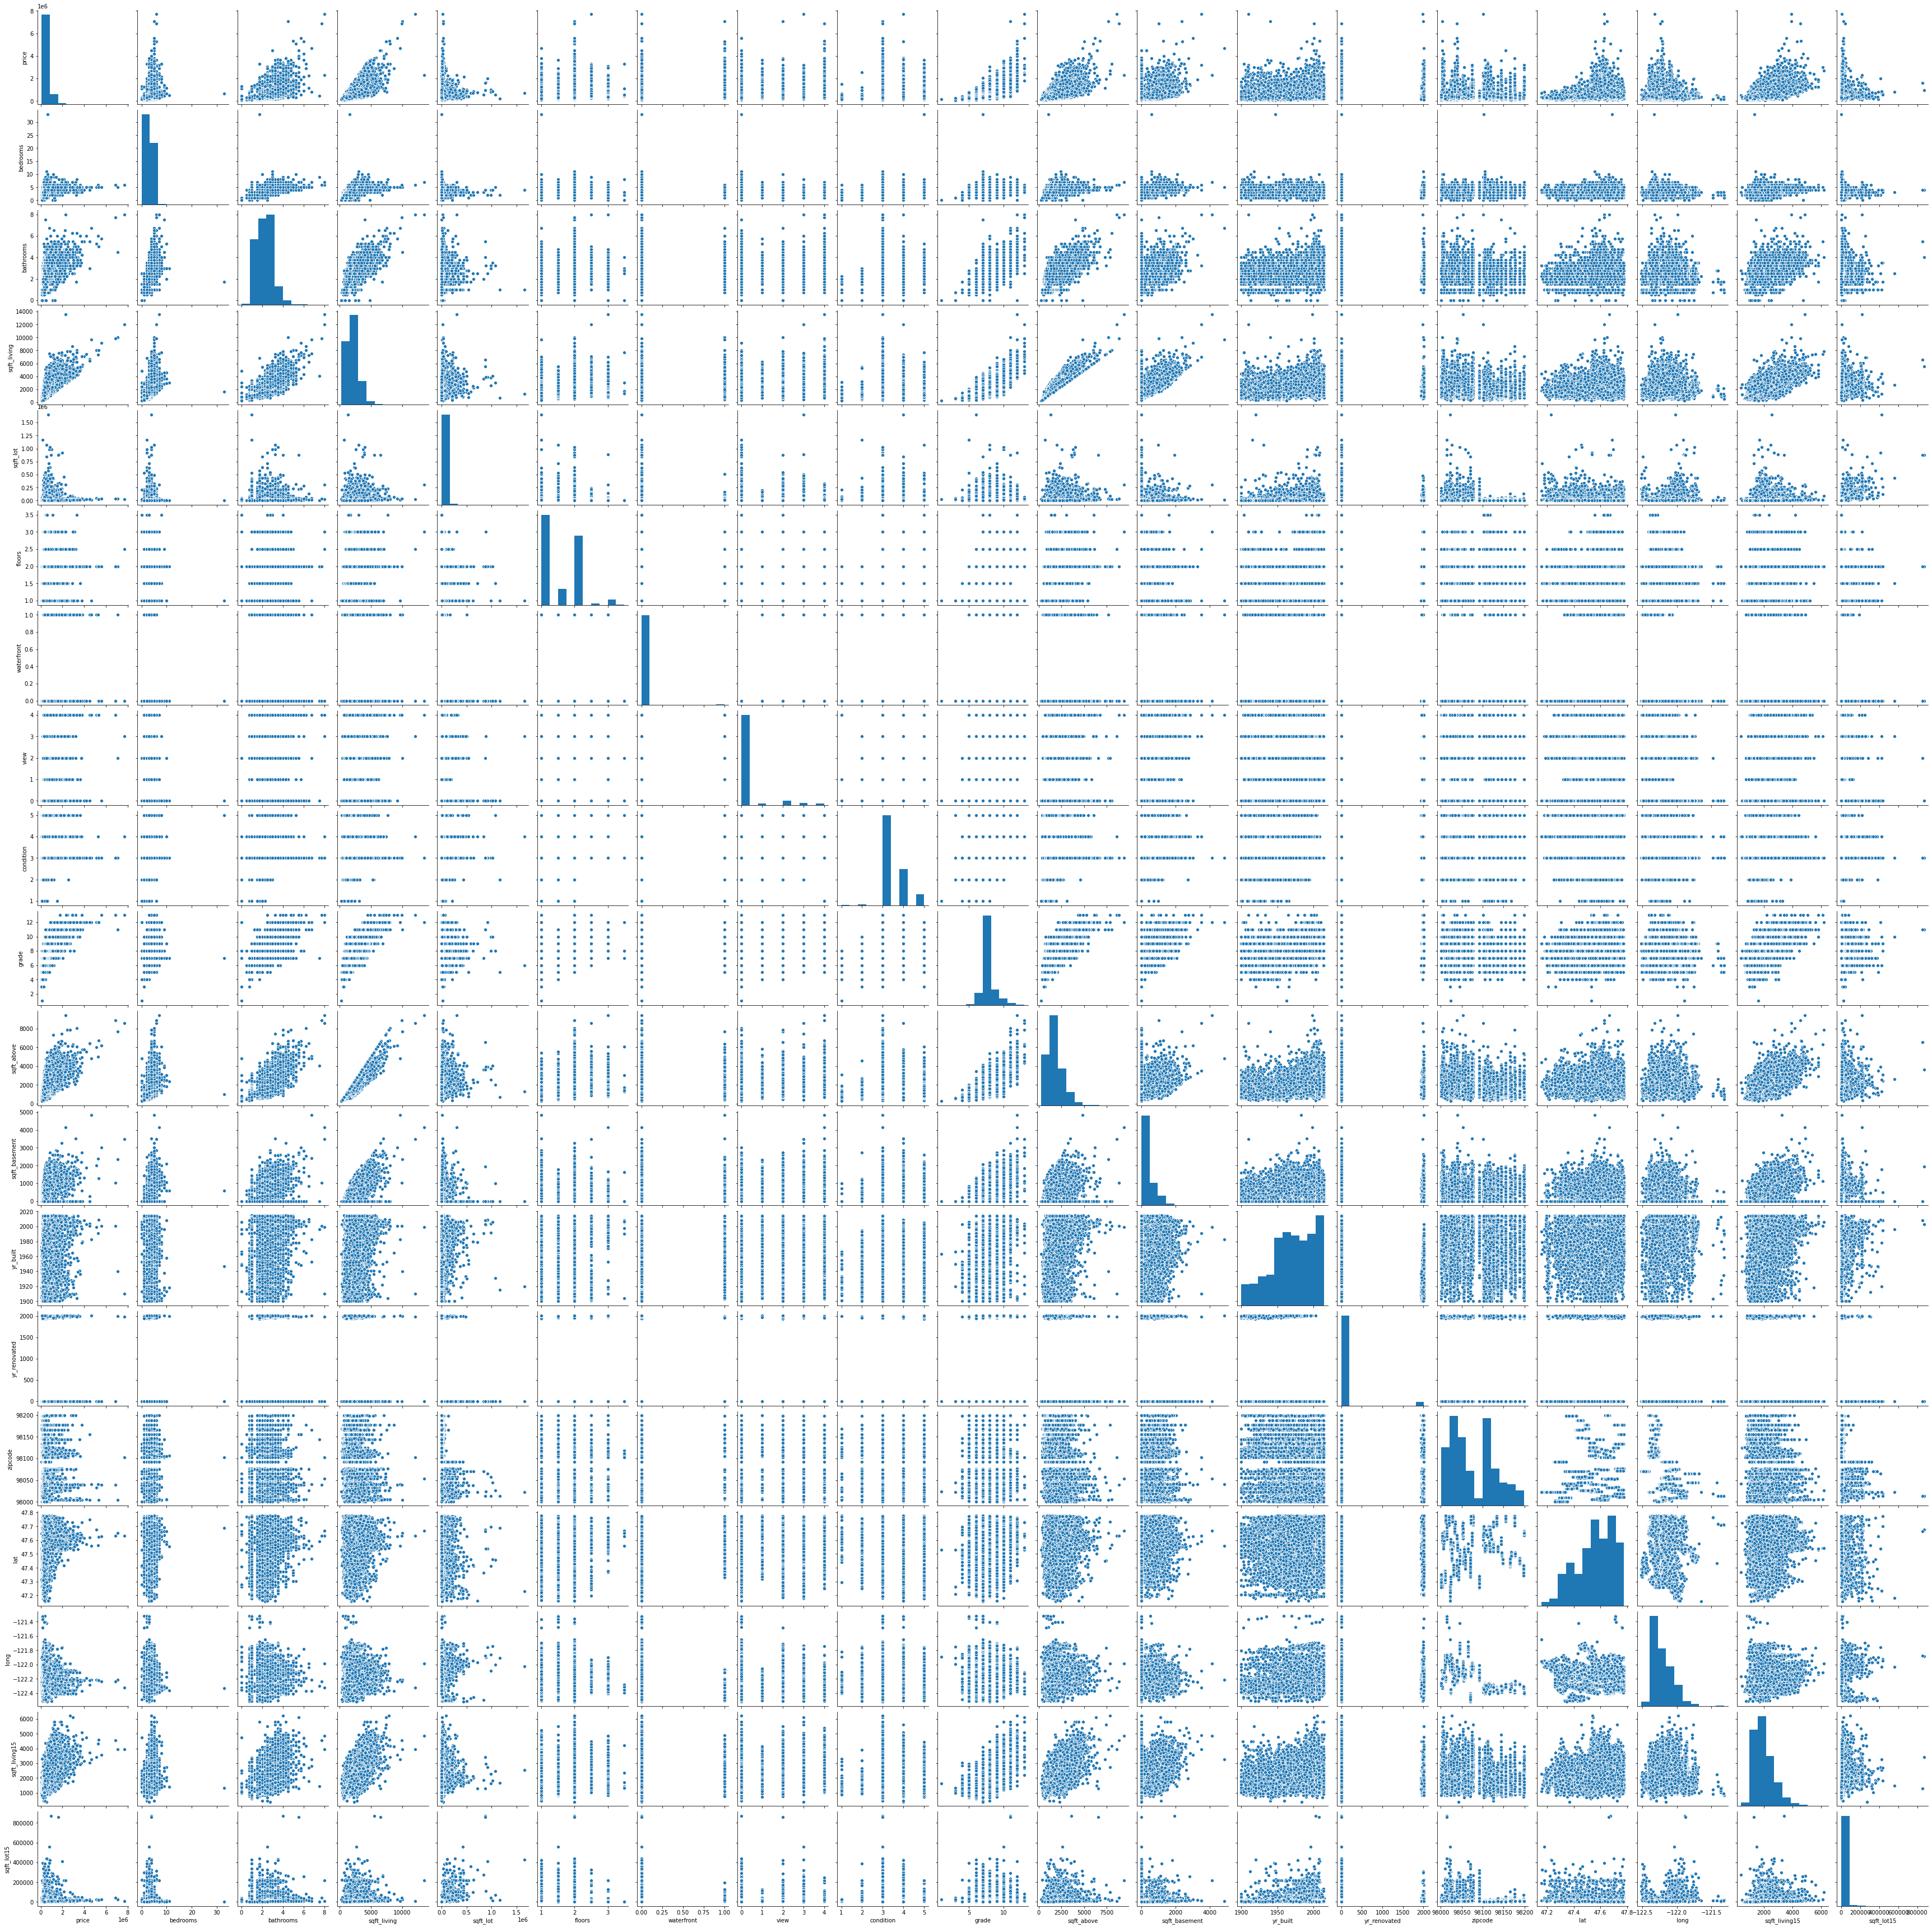

In [0]:
#housing scatter plots 
sns.pairplot(housing)

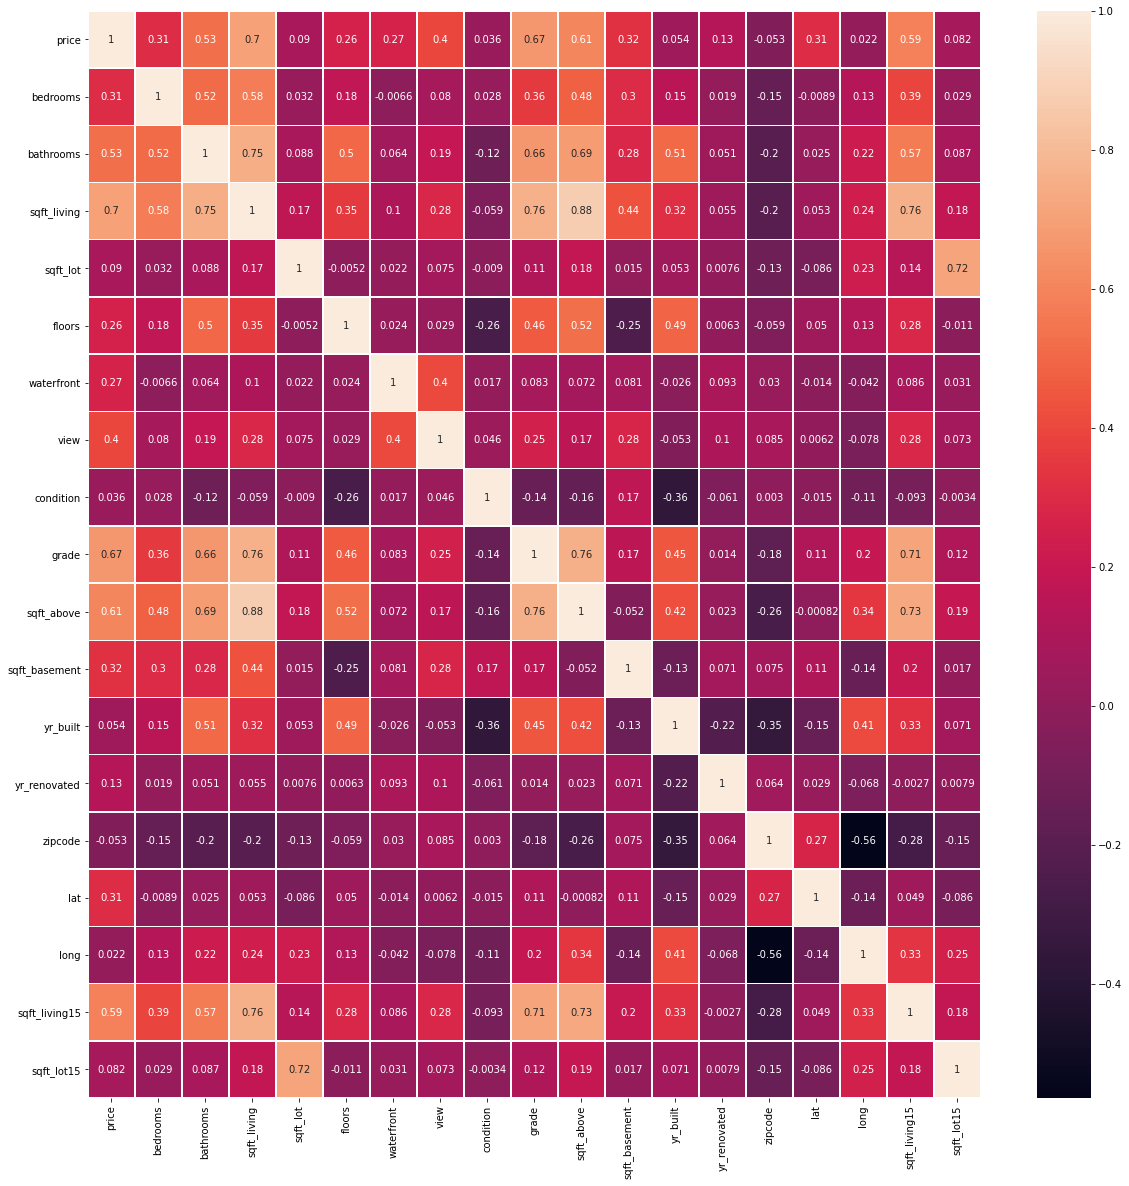

In [0]:
#Heat map
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(housing.corr(), annot=True, linewidths=0.5, ax=ax)

observations


1.   Skewness was observed in most columns
2.   Price column had a correlation with other columns 



# Multiple Linear regression

In [0]:
housing.head(1)

price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3        1.0  ... -122.257           1340        5650

[1 rows x 19 columns]

In [0]:
# Spliting into features and labels
X = housing.drop(['price'],1).values
y = housing['price'].values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=30)

from sklearn.decomposition import PCA #to apply PCA
pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ratio = pca.explained_variance_ratio_
ratio

array([0.28791901, 0.12192718, 0.10627788, 0.07540384, 0.06560323,
       0.05628381, 0.04835155, 0.04641075, 0.03614806, 0.03310989,
       0.0278364 ])

In [0]:
#Prediction 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

residuals = np.subtract(y_pred,y_test)

from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("The RMSE is:",RMSE)
lin_score = linreg.score(X_test,y_test)
print("The Score for Linear Regression:", lin_score)

The RMSE is: 207551.2729147353
The Score for Linear Regression: 0.6834610056724678


In [0]:
#coefficient for our model 
coef_dict = {}
for coef, feat in zip(linreg.coef_.reshape(-1,1),housing.drop(['price'],1).columns):
    coef_dict[feat] = coef

coef_dict = pd.DataFrame.from_dict(coef_dict,orient='index' )
coef_dict.reset_index(level=0 ,inplace= True)

coef_dict.columns = ['features','coef']
coef_dict

lin_coef = dict( coef = coef_dict['coef'],
                 features = coef_dict['features'])

data = pd.DataFrame.from_dict(lin_coef)
data

coef       features
0    99883.634372       bedrooms
1  -109029.226662      bathrooms
2    13327.255492    sqft_living
3    29844.379276       sqft_lot
4     9609.032837         floors
5   -12530.831454     waterfront
6   -97595.418477           view
7    10299.238655      condition
8   -30916.785155          grade
9    -2016.390166     sqft_above
10  -40882.174266  sqft_basement

# Regression analysis 

In [0]:
#checking for multicollinearity in our independent variable 
independent = housing.drop(['price'],1)
correlations = independent.corr()
correlations

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.000000   0.515884  ...       0.391638    0.029244
bathrooms      0.515884   1.000000  ...       0.568634    0.087175
sqft_living    0.576671   0.754665  ...       0.756420    0.183286
sqft_lot       0.031703   0.087740  ...       0.144608    0.718557
floors         0.175429   0.500653  ...       0.279885   -0.011269
waterfront    -0.006582   0.063744  ...       0.086463    0.030703
view           0.079532   0.187737  ...       0.280439    0.072575
condition      0.028472  -0.124982  ...      -0.092824   -0.003406
grade          0.356967   0.664983  ...       0.713202    0.119248
sqft_above     0.477600   0.685342  ...       0.731870    0.194050
sqft_basement  0.303093   0.283770  ...       0.200355    0.017276
yr_built       0.154178   0.506019  ...       0.326229    0.070958
yr_renovated   0.018841   0.050739  ...      -0.002673    0.007854
zipcode       -0.152668  -0.203866  ...      -0.279033   -0.147221
lat           -0.008931   0.024573  ...       0.048858   -0.086419
long           0.129473   0.223042  ...       0.334605    0.254451
sqft_living15  0.391638   0.568634  ...       1.000000    0.183192
sqft_lot15     0.029244   0.087175  ...       0.183192    1.000000

[18 rows x 18 columns]

In [0]:
#variance 
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.652063  -0.461171  ...       0.025213    0.085400
bathrooms     -0.461171   3.350793  ...       0.092133    0.071471
sqft_living   -0.195112  -5.070968  ...      -0.995106   -0.184207
sqft_lot       0.049361  -0.024127  ...       0.163944   -1.459319
floors         0.049695  -0.675075  ...       0.272617    0.072658
waterfront     0.063235   0.009760  ...       0.054452   -0.018470
view           0.114111  -0.041645  ...      -0.325615   -0.007493
condition     -0.050767  -0.137020  ...       0.075861   -0.028255
grade          0.307048  -0.268005  ...      -0.911603    0.071874
sqft_above    -0.699237   3.298868  ...      -0.638496   -0.009635
sqft_basement -0.390366   1.364083  ...       0.008388    0.029194
yr_built       0.134498  -0.935779  ...       0.077715   -0.033740
yr_renovated   0.045454  -0.259782  ...       0.099191   -0.022232
zipcode        0.080112   0.041796  ...       0.210202   -0.015505
lat            0.050789  -0.040956  ...      -0.094802    0.036659
long           0.017395   0.054055  ...      -0.354558   -0.160885
sqft_living15  0.025213   0.092133  ...       2.979713   -0.125612
sqft_lot15     0.085400   0.071471  ...      -0.125612    2.135668

[18 rows x 18 columns]

Residual plot 

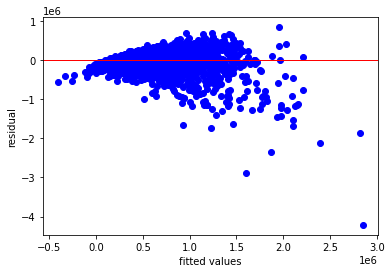

In [0]:
plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## Quantile regression 

In [0]:
#Fit quantile model
x = housing.drop('price', 1).values
y = housing['price'].values
import statsmodels.formula.api as smf

model = smf.quantreg('y ~ bedrooms', housing)

res = model.fit()

print(res.summary())
print("*****************************************************************")
print(res.params)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.04634
Model:                       QuantReg   Bandwidth:                   4.011e+04
Method:                 Least Squares   Sparsity:                    5.565e+05
Date:                Wed, 10 Jun 2020   No. Observations:                21613
Time:                        16:17:05   Df Residuals:                    21611
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7116.256     25.294      0.000    1.66e+05    1.94e+05
bedrooms      8.5e+04   2035.082     41.767      0.000     8.1e+04     8.9e+04
*****************************************************************
Intercept    179999.999994
bedrooms      85000.000002
dtype: floa

In [0]:
quantiles = [0.25,0.5,0.75]
models = []
param = []

for q in quantiles:
  res1 = model.fit(q = q)
  models.append(res1)
  param.append([q, res1.params['Intercept'], res1.params['bedrooms']] + res1.conf_int().loc['bedrooms'].tolist())

# We then make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'bedrooms_coef', 'cf_lower_bound', 'cf_upper_bound'])
param

quantile      intercept  bedrooms_coef  cf_lower_bound  cf_upper_bound
0      0.25  142000.000001   55633.333333    52395.412251    58871.254416
1      0.50  179999.999994   85000.000002    81011.089434    88988.910569
2      0.75  185999.999995  137000.000001   131347.243585   142652.756417

In [0]:
#linear regression using ols 
ols = smf.ols('y ~ bedrooms', housing).fit()
print(ols.summary())

param1 = ols.conf_int().loc['bedrooms'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           bedrooms_coef = ols.params['bedrooms'],
           cf_lower_bound = param1[0],
           cf_upper_bound = param1[1])

print(ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2270.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:19:35   Log-Likelihood:            -3.0654e+05
No. Observations:               21613   AIC:                         6.131e+05
Df Residuals:                   21611   BIC:                         6.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.296e+05   8937.619     14.506      0.0

Text(0, 0.5, 'y')

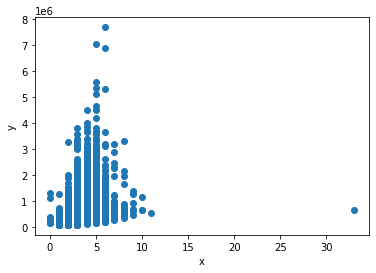

In [0]:
#plot for price in relation to bedrooms 
x = housing['bedrooms'].values
y = housing['price'].values

plt.figure(3)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

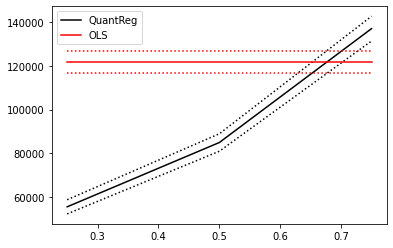

In [0]:
n = param.shape[0]
p1 = plt.plot(param['quantile'], param['bedrooms_coef'],color='black' ,label = 'QuantReg')
p2 = plt.plot(param['quantile'], param['cf_upper_bound'], linestyle = 'dotted', color='black')
p3 = plt.plot(param['quantile'], param['cf_lower_bound'], linestyle = 'dotted', color='black')
p4 = plt.plot(param['quantile'], [ols['bedrooms_coef']]* n , color = 'red', label = 'OLS')
p5 = plt.plot(param['quantile'], [ols['cf_upper_bound']]* n , color = 'red', linestyle = 'dotted')
p6 = plt.plot(param['quantile'], [ols['cf_lower_bound']]* n , color = 'red', linestyle = 'dotted')
plt.legend()
plt.show()

## Lasso regression 

In [0]:
#scaling our data 
X = housing.drop('price', 1)
y = housing['price']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


lasso = linear_model.Lasso() 

 
lasso.fit(X, y) 


print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.6997525536733683
lasso MSE: 40518022116.35509
lasso coef: [-33292.21075087  31697.82535674 259457.31589161   5315.2138083
   3614.96948484  50439.07198689  40563.44510569  17186.55108076
 112827.34401399 -83763.68277541 -58548.42851749 -77025.47282042
   7962.04001793 -31167.26388666  83526.36572597 -30269.33526327
  14850.06168935 -10439.75419149]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27085655586135.5, tolerance: 291664766083.6765
  positive)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
parameters = {'alpha': np.concatenate((np.arange(0.1,5,0.1), np.arange(2, 10, 0.5), np.arange(5, 30, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.7035335122984054
linear score: 0.7035335786693035
lasso MSE: 41558428205.31071
linear MSE: 41558418901.492836
lasso best estimator coef: [-32318.74997938  33936.85380526 260473.30363294   1219.4250272
   3397.06602014  47888.6679798   40448.57230375  17127.95714911
 113055.32973385 -83954.72760409 -60551.77088977 -77654.66667244
   7059.43622058 -29108.42013399  82343.23230652 -28950.2161528
  12493.97064067  -9654.67514713]
linear coef: [-32318.8583459   33937.50175999  81830.68452555   1219.76759861
   3397.09184609  47888.75286086  40448.56867891  17128.06685111
 113055.06892661  77113.58305386  25531.45530287 -77654.85495343
   7059.51278917 -29108.67440024  82343.37150993 -28950.46764308
  12494.58644452  -9654.9598777 ]


## Ridge regression 

In [0]:
X = housing.drop(['price'], 1)
y = housing['price']
regression = LinearRegression()
regression.fit(X,y)
model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(model)

40518022074.27615


The above output is our indicator 

In [0]:
#L2 value using Grid search 
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-1,5,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [57]:
#runing model 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

41346016610.53679

In [58]:
#fiting our model
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

40524344765.43902


In [60]:
#coefficient of each models
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 110.51388752597693,
 'bedrooms': 41166.76100970684,
 'condition': 95985.79230521746,
 'floors': 583016.9475137317,
 'grade': 70.82712640229255,
 'lat': -214960.6236517892,
 'long': 21.675849068138653,
 'price': -35797.785268820364,
 'sqft_above': 39.68676093803718,
 'sqft_basement': -2622.410499457353,
 'sqft_living': 0.12840424994537214,
 'sqft_living15': -0.3824610303963709,
 'sqft_lot': 6695.15753873498,
 'view': 26412.954334738293,
 'waterfront': 52934.07499963201,
 'yr_built': 19.824180497894055,
 'yr_renovated': -582.5716677591123,
 'zipcode': 602825.2080907975}

## Elastic Net Regression 

In [61]:
X = housing.drop('price', 1)
y = housing['price']
regression=LinearRegression()
regression.fit(X,y)
model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(model) 

40518022074.27615


In [62]:
#coefficents for our model 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 41166.76100970684,
 'bedrooms': -35797.785268820364,
 'condition': 26412.954334738293,
 'floors': 6695.15753873498,
 'grade': 95985.79230521746,
 'lat': 602825.2080907975,
 'long': -214960.6236517892,
 'sqft_above': 70.82712640229255,
 'sqft_basement': 39.68676093803718,
 'sqft_living': 110.51388752597693,
 'sqft_living15': 21.675849068138653,
 'sqft_lot': 0.12840424994537214,
 'sqft_lot15': -0.3824610303963709,
 'view': 52934.07499963201,
 'waterfront': 583016.9475137317,
 'yr_built': -2622.410499457353,
 'yr_renovated': 19.824180497894055,
 'zipcode': -582.5716677591123}

In [0]:
#creating a grid after normalizing the data 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-2,5,4),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [64]:
#fiting our model 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

119977822508.40242

In [65]:
#setting hyperparameters 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.75)
elastic.fit(X,y)
model_2=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(model_2)

40668051680.60154


In [66]:
#coefficents 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 39962.23061865801,
 'bedrooms': -29747.346593543232,
 'condition': 27925.716229448553,
 'floors': 9495.121550459527,
 'grade': 87700.03047810547,
 'lat': 578538.6497225189,
 'long': -204651.5171464631,
 'sqft_above': 86.4735902056753,
 'sqft_basement': 61.3813657261417,
 'sqft_living': 84.55012592878234,
 'sqft_living15': 34.1203570245153,
 'sqft_lot': 0.12093558044752234,
 'sqft_lot15': -0.32781801576543823,
 'view': 53030.47834707162,
 'waterfront': 560893.351200282,
 'yr_built': -2316.6484700597125,
 'yr_renovated': 24.732533509562018,
 'zipcode': -478.5338556603298}

Follow up questions

> Did we have the right data 



> Do we need more data to answer our question 





> Did we have the right question 





